In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.losses import categorical_crossentropy



In [13]:
# # Focal Loss Function
# def focal_loss(gamma=3.0, alpha=0.5):
#     def focal_loss_fixed(y_true, y_pred):
#         epsilon = tf.keras.backend.epsilon()
#         y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
#         focal_loss = -y_true * (alpha * tf.math.pow(1 - y_pred, gamma) * tf.math.log(y_pred))
#         return tf.reduce_sum(focal_loss, axis=-1)
#     return focal_loss_fixed

In [14]:
# Define the MLP model with ReLU activation
def create_mlp_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [15]:
num_classes = 2

# Load dataset hasil Normalisasi_Extreme
file_path_normalisasi_extreme = 'D:\Tugas Akhir\Stroke\data_setelah_penghapusan_dan_urutan.csv'
df_normalisasi_extreme = pd.read_csv(file_path_normalisasi_extreme)

# Ganti koma dengan titik dan ubah tipe data ke float32 untuk kolom tertentu
columns_to_convert = ['age', 'avg_glucose_level', 'bmi']
df_normalisasi_extreme[columns_to_convert] = df_normalisasi_extreme[columns_to_convert].replace(',', '.', regex=True).astype('float32')

# Pisahkan fitur dan target untuk dataset hasil oversampling Normalisasi_Extreme
X_normalisasi_extreme = df_normalisasi_extreme.drop('stroke', axis=1)
y_normalisasi_extreme = df_normalisasi_extreme['stroke']

# Mengonversi target menjadi one-hot encoding untuk Normalisasi_Extreme
y_normalisasi_one_hot_extreme = tf.keras.utils.to_categorical(y_normalisasi_extreme, num_classes)

# Pastikan tipe data float32 untuk fitur
X_normalisasi_extreme = X_normalisasi_extreme.astype('float32')


# Load dataset hasil Normalisasi_Moderate
file_path_normalisasi_moderate = 'D:\Tugas Akhir\Stroke\hasil_setelah_normalisasi.csv'
df_normalisasi_moderate = pd.read_csv(file_path_normalisasi_moderate)

# Ganti koma dengan titik dan ubah tipe data ke float32 untuk kolom tertentu
columns_to_convert = ['age', 'avg_glucose_level', 'bmi']
df_normalisasi_moderate[columns_to_convert] = df_normalisasi_moderate[columns_to_convert].replace(',', '.', regex=True).astype('float32')

# Pisahkan fitur dan target untuk dataset hasil oversampling Normalisasi_Moderate
X_normalisasi_moderate = df_normalisasi_moderate.drop('stroke', axis=1)
y_normalisasi_moderate = df_normalisasi_moderate['stroke']

# Mengonversi target menjadi one-hot encoding untuk Normalisasi_Moderate
y_normalisasi_one_hot_moderate = tf.keras.utils.to_categorical(y_normalisasi_moderate, num_classes)

# Pastikan tipe data float32 untuk fitur
X_normalisasi_moderate = X_normalisasi_moderate.astype('float32')



# Load dataset hasil oversampling Normalisasi_Mild
file_path_oversampled_mild = 'D:\Tugas Akhir\Stroke\data_oversampled.csv'
df_normalisasi_mild = pd.read_csv(file_path_oversampled_mild)

# Ganti koma dengan titik dan ubah tipe data ke float32 untuk kolom tertentu
columns_to_convert = ['age', 'avg_glucose_level', 'bmi']
df_normalisasi_mild[columns_to_convert] = df_normalisasi_mild[columns_to_convert].replace(',', '.', regex=True).astype('float32')

# Pisahkan fitur dan target untuk dataset hasil oversampling Normalisasi_Mild
X_normalisasi_mild = df_normalisasi_mild.drop('stroke', axis=1)
y_normalisasi_mild = df_normalisasi_mild['stroke']

# Mengonversi target menjadi one-hot encoding untuk Normalisasi_Mild
y_normalisasi_one_hot_mild = tf.keras.utils.to_categorical(y_normalisasi_mild, num_classes)

# Pastikan tipe data float32 untuk fitur
X_normalisasi_mild = X_normalisasi_mild.astype('float32')

In [16]:
df_normalisasi_extreme

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,0.5088,0,0,1,0,1,0,0,0.2276,0.3306,0,0,0,1,1
1,1,0.6140,0,0,0,0,1,0,0,0.1570,0.5475,0,0,1,0,1
2,0,0.9649,0,1,1,0,0,1,0,0.9122,0.3967,0,1,0,0,1
3,1,0.8246,1,0,1,0,1,0,1,0.0896,0.2438,0,1,0,0,1
4,0,0.6667,0,1,1,0,1,0,1,0.6535,0.5207,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3507,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3508,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3509,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


In [17]:
df_normalisasi_moderate

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
2,1,0.4211,0,0,1,0,1,0,0,0.5358,0.4773,0,0,0,1,1
3,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
4,0,0.9825,0,0,1,0,1,0,0,0.6050,0.3657,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3685,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3686,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3687,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


In [18]:
df_normalisasi_mild

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
2,1,0.4211,0,0,1,0,1,0,0,0.5358,0.4773,0,0,0,1,1
3,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
4,0,0.9825,0,0,1,0,1,0,0,0.6050,0.3657,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,1,0.8804,0,0,1,0,1,0,1,0.6311,0.3073,1,0,0,0,1
5767,0,0.8583,0,0,1,0,1,0,1,0.1403,0.2548,1,0,0,0,1
5768,1,0.9298,0,0,1,0,1,0,0,0.0904,0.1904,1,0,0,0,1
5769,1,0.9009,0,0,1,0,1,0,1,0.2097,0.2386,1,0,0,0,1


In [19]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_normalisasi_extreme['stroke'].value_counts()
# Tampilkan output
print("Data Pada Normalisasi 'stroke':")
print(stroke_counts)

# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_normalisasi_moderate['stroke'].value_counts()
# Tampilkan output
print("Data Pada Normalisasi 'stroke':")
print(stroke_counts)

# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_normalisasi_mild['stroke'].value_counts()
# Tampilkan output
print("Data Pada Normalisasi 'stroke':")
print(stroke_counts)

Data Pada Normalisasi 'stroke':
stroke
0    3481
1      30
Name: count, dtype: int64
Data Pada Normalisasi 'stroke':
stroke
0    3481
1     208
Name: count, dtype: int64
Data Pada Normalisasi 'stroke':
stroke
0    3481
1    2290
Name: count, dtype: int64


In [20]:
# Pisahkan data normalisasi menjadi set pelatihan dan pengujian
X_train_normalisasi_extreme, X_test_normalisasi_extreme, y_train_normalisasi_extreme, y_test_normalisasi_extreme = train_test_split(X_normalisasi_extreme, y_normalisasi_extreme, test_size=0.2, random_state=42)

# Pisahkan data normalisasi menjadi set pelatihan dan pengujian
X_train_normalisasi_moderate, X_test_normalisasi_moderate, y_train_normalisasi_moderate, y_test_normalisasi_moderate = train_test_split(X_normalisasi_moderate, y_normalisasi_moderate, test_size=0.2, random_state=42)

# Pisahkan data normalisasi menjadi set pelatihan dan pengujian
X_train_normalisasi_mild, X_test_normalisasi_mild, y_train_normalisasi_mild, y_test_normalisasi_mild = train_test_split(X_normalisasi_mild, y_normalisasi_mild, test_size=0.2, random_state=42)

In [21]:
import numpy as np
# Menghitung jumlah kelas 0 dan 1 pada normalisasi extreme (data latih)
unique_normalisasi_train_extreme, counts_normalisasi_train_extreme = np.unique(y_train_normalisasi_extreme, return_counts=True)
num_class_0_normalisasi_train_extreme = counts_normalisasi_train_extreme[unique_normalisasi_train_extreme == 0][0]
num_class_1_normalisasi_train_extreme = counts_normalisasi_train_extreme[unique_normalisasi_train_extreme == 1][0]

# Menghitung jumlah kelas 0 dan 1 pada normalisasi extreme (data uji)
unique_normalisasi_test_extreme, counts_normalisasi_test_extreme = np.unique(y_test_normalisasi_extreme, return_counts=True)
num_class_0_normalisasi_test_extreme = counts_normalisasi_test_extreme[unique_normalisasi_test_extreme == 0][0]
num_class_1_normalisasi_test_extreme = counts_normalisasi_test_extreme[unique_normalisasi_test_extreme == 1][0]

print("Data Latih Normalisasi Extreme:")
print(f"Jumlah data latih: {len(y_train_normalisasi_extreme)}")
print(f"Jumlah kelas 0: {num_class_0_normalisasi_train_extreme}")
print(f"Jumlah kelas 1: {num_class_1_normalisasi_train_extreme}")
print("\nData Uji Normalisasi Extreme:")
print(f"Jumlah data uji: {len(y_test_normalisasi_extreme)}")
print(f"Jumlah kelas 0: {num_class_0_normalisasi_test_extreme}")
print(f"Jumlah kelas 1: {num_class_1_normalisasi_test_extreme}")
print("===========================================")

# Menghitung jumlah kelas 0 dan 1 pada normalisasi moderate (data latih)
unique_normalisasi_train_moderate, counts_normalisasi_train_moderate = np.unique(y_train_normalisasi_moderate, return_counts=True)
num_class_0_normalisasi_train_moderate = counts_normalisasi_train_moderate[unique_normalisasi_train_moderate == 0][0]
num_class_1_normalisasi_train_moderate = counts_normalisasi_train_moderate[unique_normalisasi_train_moderate== 1][0]

# Menghitung jumlah kelas 0 dan 1 pada normalisasi moderate (data uji)
unique_normalisasi_test_moderate, counts_normalisasi_test_moderate = np.unique(y_test_normalisasi_moderate, return_counts=True)
num_class_0_normalisasi_test_moderate = counts_normalisasi_test_moderate[unique_normalisasi_test_moderate == 0][0]
num_class_1_normalisasi_test_moderate = counts_normalisasi_test_moderate[unique_normalisasi_test_moderate == 1][0]

print("Data Latih Normalisasi moderate:")
print(f"Jumlah data latih: {len(y_train_normalisasi_moderate)}")
print(f"Jumlah kelas 0: {num_class_0_normalisasi_train_moderate}")
print(f"Jumlah kelas 1: {num_class_1_normalisasi_train_moderate}")
print("\nData Uji Normalisasi moderate:")
print(f"Jumlah data uji: {len(y_test_normalisasi_moderate)}")
print(f"Jumlah kelas 0: {num_class_0_normalisasi_test_moderate}")
print(f"Jumlah kelas 1: {num_class_1_normalisasi_test_moderate}")
print("===========================================")

# Menghitung jumlah kelas 0 dan 1 pada normalisasi mild (data latih)
unique_normalisasi_train_mild, counts_normalisasi_train_mild = np.unique(y_train_normalisasi_mild, return_counts=True)
num_class_0_normalisasi_train_mild = counts_normalisasi_train_mild[unique_normalisasi_train_mild == 0][0]
num_class_1_normalisasi_train_mild = counts_normalisasi_train_mild[unique_normalisasi_train_mild== 1][0]

# Menghitung jumlah kelas 0 dan 1 pada normalisasi mild (data uji)
unique_normalisasi_test_mild, counts_normalisasi_test_mild = np.unique(y_test_normalisasi_mild, return_counts=True)
num_class_0_normalisasi_test_mild = counts_normalisasi_test_mild[unique_normalisasi_test_mild == 0][0]
num_class_1_normalisasi_test_mild = counts_normalisasi_test_mild[unique_normalisasi_test_mild == 1][0]

print("Data Latih Normalisasi mild:")
print(f"Jumlah data latih: {len(y_train_normalisasi_mild)}")
print(f"Jumlah kelas 0: {num_class_0_normalisasi_train_mild}")
print(f"Jumlah kelas 1: {num_class_1_normalisasi_train_mild}")
print("\nData Uji Normalisasi mild:")
print(f"Jumlah data uji: {len(y_test_normalisasi_mild)}")
print(f"Jumlah kelas 0: {num_class_0_normalisasi_test_mild}")
print(f"Jumlah kelas 1: {num_class_1_normalisasi_test_mild}")
print("===========================================")

Data Latih Normalisasi Extreme:
Jumlah data latih: 2808
Jumlah kelas 0: 2784
Jumlah kelas 1: 24

Data Uji Normalisasi Extreme:
Jumlah data uji: 703
Jumlah kelas 0: 697
Jumlah kelas 1: 6
Data Latih Normalisasi moderate:
Jumlah data latih: 2951
Jumlah kelas 0: 2789
Jumlah kelas 1: 162

Data Uji Normalisasi moderate:
Jumlah data uji: 738
Jumlah kelas 0: 692
Jumlah kelas 1: 46
Data Latih Normalisasi mild:
Jumlah data latih: 4616
Jumlah kelas 0: 2788
Jumlah kelas 1: 1828

Data Uji Normalisasi mild:
Jumlah data uji: 1155
Jumlah kelas 0: 693
Jumlah kelas 1: 462


In [22]:
# Menetapkan bentuk input dan jumlah kelas berdasarkan fitur dan target untuk Normalisasi Extreme
input_shape_normalisasi_extreme = X_train_normalisasi_extreme.shape[1:]
num_classes_normalisasi_extreme = y_normalisasi_one_hot_extreme.shape[1]  # Disesuaikan untuk mendapatkan jumlah kelas secara dinamis
y_train_normalisasi_one_hot_extreme = tf.keras.utils.to_categorical(y_train_normalisasi_extreme, num_classes_normalisasi_extreme)
y_test_normalisasi_one_hot_extreme = tf.keras.utils.to_categorical(y_test_normalisasi_extreme, num_classes_normalisasi_extreme)

# Menetapkan bentuk input dan jumlah kelas berdasarkan fitur dan target untuk Normalisasi Moderate
input_shape_normalisasi_moderate = X_train_normalisasi_moderate.shape[1:]
num_classes_normalisasi_moderate = y_normalisasi_one_hot_moderate.shape[1]  # Disesuaikan untuk mendapatkan jumlah kelas secara dinamis
y_train_normalisasi_one_hot_moderate = tf.keras.utils.to_categorical(y_train_normalisasi_moderate, num_classes_normalisasi_moderate)
y_test_normalisasi_one_hot_moderate = tf.keras.utils.to_categorical(y_test_normalisasi_moderate, num_classes_normalisasi_moderate)

# Menetapkan bentuk input dan jumlah kelas berdasarkan fitur dan target untuk Normalisasi Mild
input_shape_normalisasi_mild = X_train_normalisasi_mild.shape[1:]
num_classes_normalisasi_mild = y_normalisasi_one_hot_mild.shape[1]  # Disesuaikan untuk mendapatkan jumlah kelas secara dinamis
y_train_normalisasi_one_hot_mild = tf.keras.utils.to_categorical(y_train_normalisasi_mild, num_classes_normalisasi_mild)
y_test_normalisasi_one_hot_mild = tf.keras.utils.to_categorical(y_test_normalisasi_mild, num_classes_normalisasi_mild)

In [23]:
# Create the MLP model for Normalisasi Extreme
model_normalisasi_extreme = create_mlp_model(input_shape_normalisasi_extreme, num_classes_normalisasi_extreme)

# Compile the model with Focal Loss
model_normalisasi_extreme.compile(optimizer='adam',
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])
# Create the MLP model for Normalisasi Moderate
model_normalisasi_moderate = create_mlp_model(input_shape_normalisasi_moderate, num_classes_normalisasi_moderate)

# Compile the model with Focal Loss
model_normalisasi_moderate.compile(optimizer='adam',
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])
# Create the MLP model for Normalisasi Mild
model_normalisasi_mild = create_mlp_model(input_shape_normalisasi_mild, num_classes_normalisasi_mild)

# Compile the model with Focal Loss
model_normalisasi_mild.compile(optimizer='adam',
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])

In [24]:
# Calculate class weights for normalisasi
class_weights_normalisasi_extreme = {0: num_class_1_normalisasi_train_extreme / num_class_0_normalisasi_train_extreme, 1: 1.0}

# Print model summary for Normalisasi
model_normalisasi_extreme.summary()

# Train the model for Normalisasi with class weights
history_normalisasi_extreme = model_normalisasi_extreme.fit(X_train_normalisasi_extreme, y_train_normalisasi_one_hot_extreme, epochs=50, batch_size=32,
                                  validation_split=0.2, class_weight=class_weights_normalisasi_extreme)
# Evaluate the model on the test set for Normalisasi
test_loss_normalisasi_extreme, test_acc_normalisasi_extreme = model_normalisasi_extreme.evaluate(X_test_normalisasi_extreme, y_test_normalisasi_one_hot_extreme)
print(f'Test Loss (Normalisasi) Extreme: {test_loss_normalisasi_extreme}, Test Accuracy (Normalisasi) Extreme: {test_acc_normalisasi_extreme}')

# Predict classes for the test set for Normalisasi
y_pred_probabilities_normalisasi_extreme = model_normalisasi_extreme.predict(X_test_normalisasi_extreme)
y_pred_normalisasi_extreme = y_pred_probabilities_normalisasi_extreme.argmax(axis=1)

# Convert one-hot encoded y_test back to numerical values for Normalisasi
y_true_normalisasi_extreme = np.array(y_test_normalisasi_extreme)

# Calculate precision, recall, and F1-score for Normalisasi
report_normalisasi_extreme = classification_report(y_true_normalisasi_extreme, y_pred_normalisasi_extreme)
print("Classification Report (Normalisasi) Extreme:\n", report_normalisasi_extreme)

# Confusion Matrix for Normalisasi
conf_matrix_normalisasi_extreme = confusion_matrix(y_true_normalisasi_extreme, y_pred_normalisasi_extreme)
print("Confusion Matrix (Normalisasi) Extreme:\n", conf_matrix_normalisasi_extreme)




# Calculate class weights for normalisasi
class_weights_normalisasi_moderate = {0: num_class_1_normalisasi_train_moderate / num_class_0_normalisasi_train_moderate, 1: 1.0}

# Print model summary for Normalisasi
model_normalisasi_moderate.summary()

# Train the model for Normalisasi with class weights
history_normalisasi_moderate = model_normalisasi_moderate.fit(X_train_normalisasi_moderate, y_train_normalisasi_one_hot_moderate, epochs=50, batch_size=32,
                                  validation_split=0.2, class_weight=class_weights_normalisasi_moderate)
# Evaluate the model on the test set for Normalisasi
test_loss_normalisasi_moderate, test_acc_normalisasi_moderate = model_normalisasi_moderate.evaluate(X_test_normalisasi_moderate, y_test_normalisasi_one_hot_moderate)
print(f'Test Loss (Normalisasi) Moderate: {test_loss_normalisasi_moderate}, Test Accuracy (Normalisasi) Moderate: {test_acc_normalisasi_moderate}')

# Predict classes for the test set for Normalisasi
y_pred_probabilities_normalisasi_moderate = model_normalisasi_moderate.predict(X_test_normalisasi_moderate)
y_pred_normalisasi_moderate = y_pred_probabilities_normalisasi_moderate.argmax(axis=1)

# Convert one-hot encoded y_test back to numerical values for Normalisasi
y_true_normalisasi_moderate = np.array(y_test_normalisasi_moderate)

# Calculate precision, recall, and F1-score for Normalisasi
report_normalisasi_moderate = classification_report(y_true_normalisasi_moderate, y_pred_normalisasi_moderate)
print("Classification Report (Normalisasi) Moderate:\n", report_normalisasi_moderate)

# Confusion Matrix for Normalisasi
conf_matrix_normalisasi_moderate = confusion_matrix(y_true_normalisasi_moderate, y_pred_normalisasi_moderate)
print("Confusion Matrix (Normalisasi) Moderate:\n", conf_matrix_normalisasi_moderate)




# Calculate class weights for normalisasi
class_weights_normalisasi_mild = {0: num_class_1_normalisasi_train_mild / num_class_0_normalisasi_train_mild, 1: 1.0}

# Print model summary for Normalisasi
model_normalisasi_mild.summary()

# Train the model for Normalisasi with class weights
history_normalisasi_mild = model_normalisasi_mild.fit(X_train_normalisasi_mild, y_train_normalisasi_one_hot_mild, epochs=50, batch_size=32,
                                  validation_split=0.2, class_weight=class_weights_normalisasi_mild)
# Evaluate the model on the test set for Normalisasi
test_loss_normalisasi_mild, test_acc_normalisasi_mild = model_normalisasi_mild.evaluate(X_test_normalisasi_mild, y_test_normalisasi_one_hot_mild)
print(f'Test Loss (Normalisasi) Mild: {test_loss_normalisasi_mild}, Test Accuracy (Normalisasi) Mild: {test_acc_normalisasi_mild}')

# Predict classes for the test set for Normalisasi
y_pred_probabilities_normalisasi_mild = model_normalisasi_mild.predict(X_test_normalisasi_mild)
y_pred_normalisasi_mild = y_pred_probabilities_normalisasi_mild.argmax(axis=1)

# Convert one-hot encoded y_test back to numerical values for Normalisasi
y_true_normalisasi_mild = np.array(y_test_normalisasi_mild)

# Calculate precision, recall, and F1-score for Normalisasi
report_normalisasi_mild = classification_report(y_true_normalisasi_mild, y_pred_normalisasi_mild)
print("Classification Report (Normalisasi) Mild:\n", report_normalisasi_mild)

# Confusion Matrix for Normalisasi
conf_matrix_normalisasi_mild = confusion_matrix(y_true_normalisasi_mild, y_pred_normalisasi_mild)
print("Confusion Matrix (Normalisasi) Mild:\n", conf_matrix_normalisasi_mild)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 128)               2048      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 


Total params: 10434 (40.76 KB)
Trainable params: 10434 (40.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50


71/71 [==============================] - 3s 12ms/step - loss: 0.0118 - accuracy: 0.7867 - val_loss: 0.6591 - val_accuracy: 0.5605
Epoch 2/50
71/71 [==============================] - 0s 6ms/step - loss: 0.0094 - accuracy: 0.7217 - val_loss: 0.5896 - val_accuracy: 0.6352
Epoch 3/50
71/71 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 0.7431 - val_loss: 0.4996 - val_accuracy: 0.7153
Epoch 4/50
71/71 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.7551 - val_loss: 0.2789 - val_accuracy: 0.8737
Epoch 5/50
71/71 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.8032 - val_loss: 0.5518 - val_accuracy: 0.6975
Epoch 6/50
71/71 [==============================] - 0s 6ms/step - loss: 0.0054 - accuracy: 0.8134 - val_loss: 0.5141 - val_accura

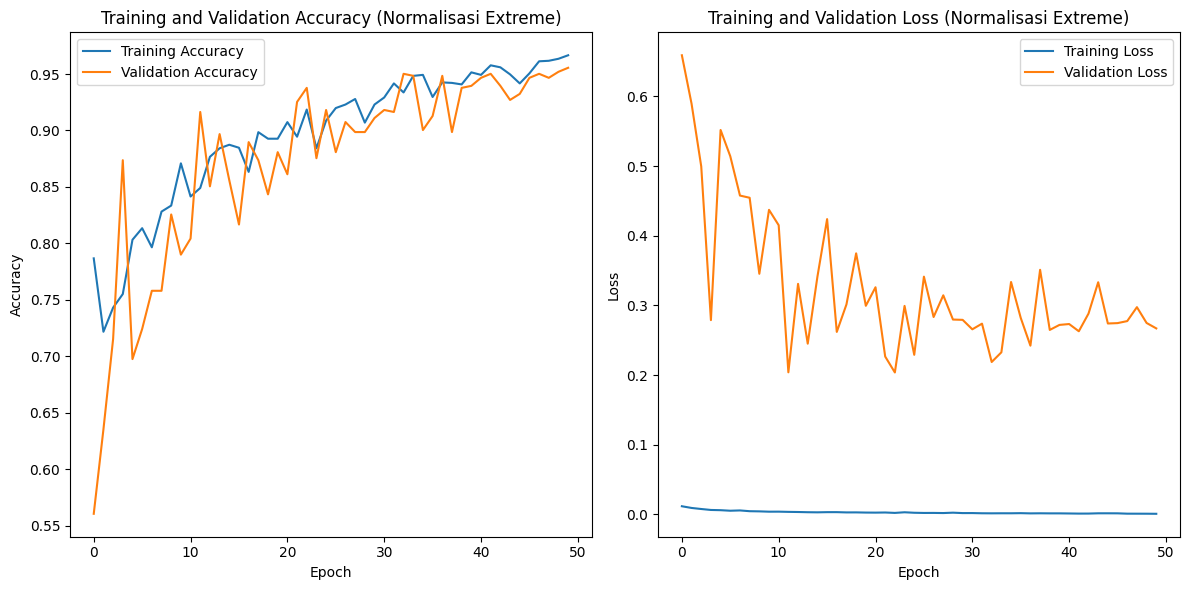

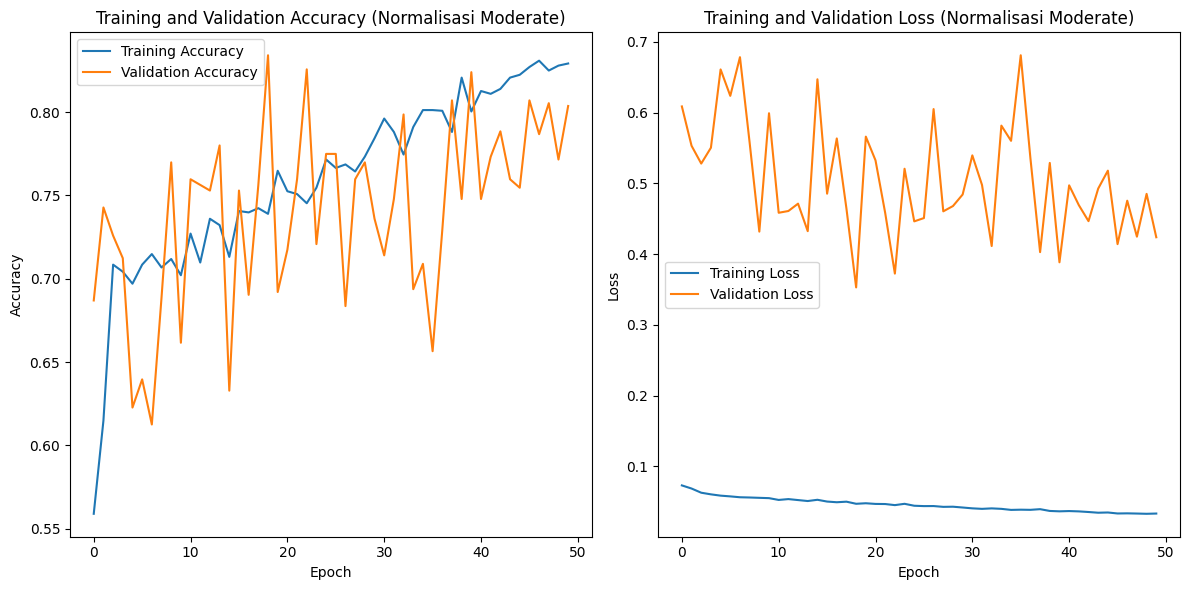

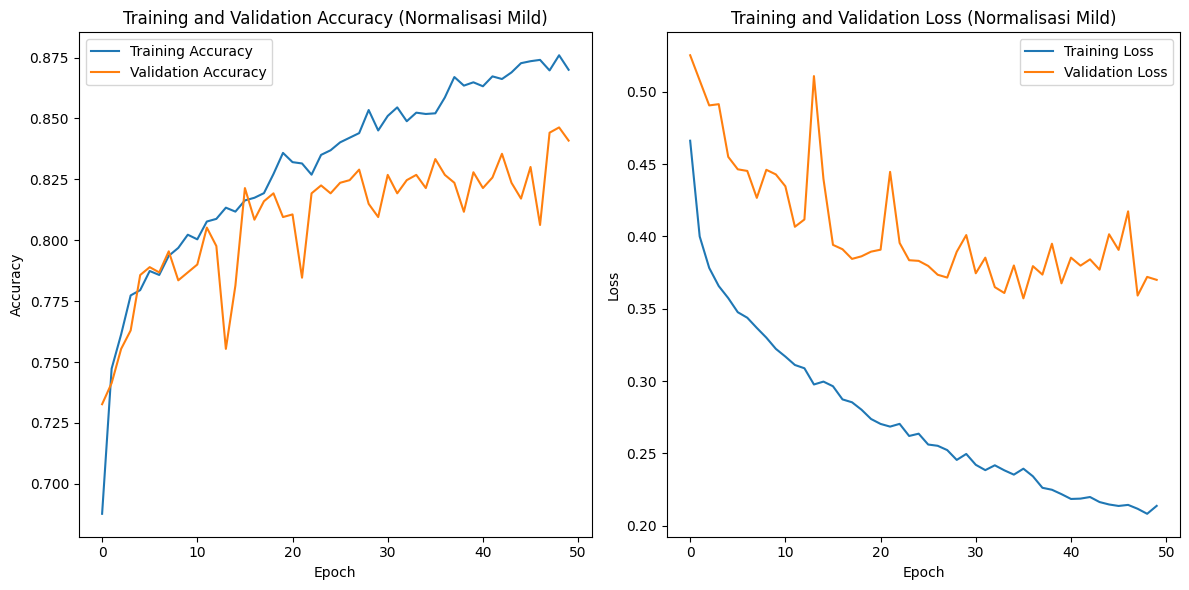

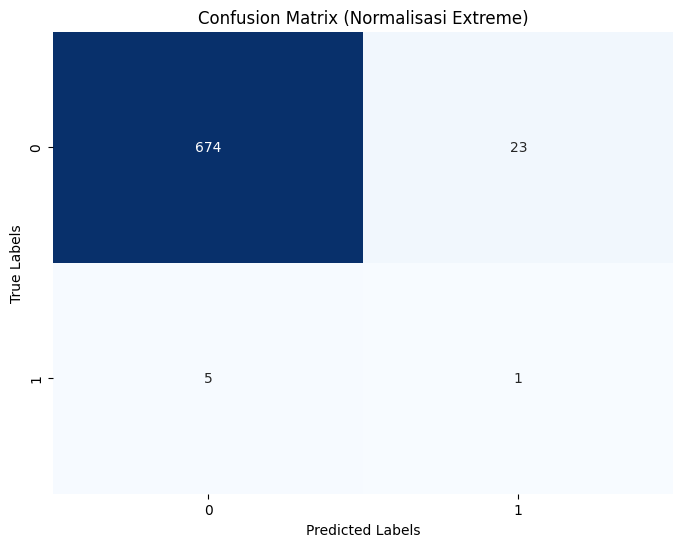

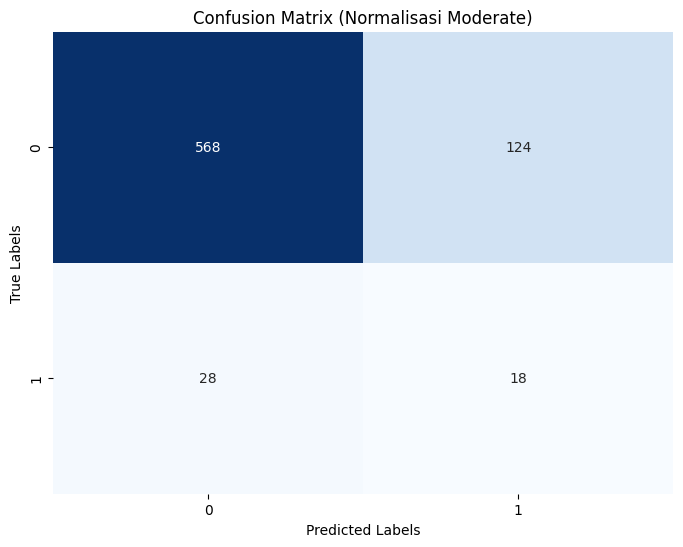

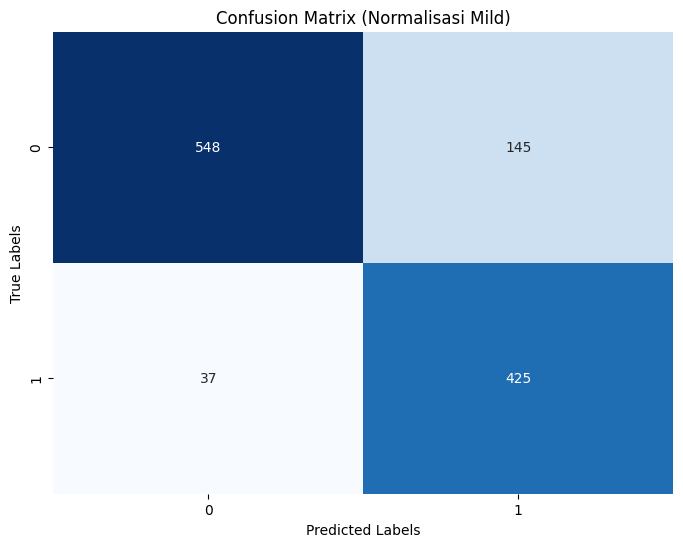

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
# Visualisasi Akurasi dan Loss untuk Normalisasi Extreme
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_normalisasi_extreme.history['accuracy'], label='Training Accuracy')
plt.plot(history_normalisasi_extreme.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Normalisasi Extreme)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_normalisasi_extreme.history['loss'], label='Training Loss')
plt.plot(history_normalisasi_extreme.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Normalisasi Extreme)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualisasi Akurasi dan Loss untuk Normalisasi Moderate
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_normalisasi_moderate.history['accuracy'], label='Training Accuracy')
plt.plot(history_normalisasi_moderate.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Normalisasi Moderate)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_normalisasi_moderate.history['loss'], label='Training Loss')
plt.plot(history_normalisasi_moderate.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Normalisasi Moderate)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualisasi Akurasi dan Loss untuk Normalisasi Mild
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_normalisasi_mild.history['accuracy'], label='Training Accuracy')
plt.plot(history_normalisasi_mild.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Normalisasi Mild)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_normalisasi_mild.history['loss'], label='Training Loss')
plt.plot(history_normalisasi_mild.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Normalisasi Mild)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualisasi Confusion Matrix untuk Normalisasi_Extreme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalisasi_extreme, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Normalisasi Extreme)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Visualisasi Confusion Matrix untuk ADASYN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalisasi_moderate, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Normalisasi Moderate)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Visualisasi Confusion Matrix untuk PCA-KMeans
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalisasi_mild, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Normalisasi Mild)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
